# 02_preprocessing - Data Cleaning and Preprocessing

This notebook demonstrates simple preprocessing steps using `src/preprocessing.py`. Each step is in its own cell for clarity.

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
import pandas as pd
from IPython.display import display

RAW_DIR = os.path.abspath(os.path.join('..', 'data', 'raw'))
CSV_LIST = [f for f in os.listdir(RAW_DIR) if f.lower().endswith('.csv')] if os.path.exists(RAW_DIR) else []
print('Found CSV files:', CSV_LIST)


Found CSV files: ['SAML-D.csv', 'sample.csv']


In [2]:
# Load the dataset using src/load_data
if not CSV_LIST:
    print('No CSV in data/raw. Please add dataset file and re-run.')
else:
    dataset_path = os.path.join(RAW_DIR, CSV_LIST[0])
    from load_data import load_dataset
    df = load_dataset(dataset_path)
    print('\nLoaded into variable `df`.')


Loading dataset from: c:\Users\mazen\Desktop\Uni\Term 9\Data Mining\Anti-Money Laundering (AML) Detection System\aml_project\data\raw\SAML-D.csv

Dataset loaded successfully!
Shape: 9504852 rows, 12 columns

First 5 rows:
       Time        Date  Sender_account  Receiver_account    Amount  \
0  10:35:19  2022-10-07      8724731955        2769355426   1459.15   
1  10:35:20  2022-10-07      1491989064        8401255335   6019.64   
2  10:35:20  2022-10-07       287305149        4404767002  14328.44   
3  10:35:21  2022-10-07      5376652437        9600420220  11895.00   
4  10:35:21  2022-10-07      9614186178        3803336972    115.25   

  Payment_currency Received_currency Sender_bank_location  \
0        UK pounds         UK pounds                   UK   
1        UK pounds            Dirham                   UK   
2        UK pounds         UK pounds                   UK   
3        UK pounds         UK pounds                   UK   
4        UK pounds         UK pounds          

In [3]:
# Show first rows
try:
    display(df.head())
except NameError:
    print('`df` is not defined. Load the CSV first.')


,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [4]:
# Show shape and columns
try:
    print('Shape:', df.shape)
    print('Columns:', df.columns.tolist())
except NameError:
    pass


Shape: (9504852, 12)
Columns: ['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount', 'Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type', 'Is_laundering', 'Laundering_type']


In [5]:
# DataFrame info
try:
    print(df.info())
except NameError:
    pass


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB
None


In [6]:
# Basic descriptive statistics
try:
    display(df.describe(include='all'))
except NameError:
    pass


,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
count,9504852,9504852,9.504852e+06,9.504852e+06,9.504852e+06,9504852,9504852,9504852,9504852,9504852,9.504852e+06,9504852
unique,86400,321,NaN,NaN,NaN,13,13,18,18,7,NaN,28
top,15:22:42,2023-02-09,NaN,NaN,NaN,UK pounds,UK pounds,UK,UK,Credit card,NaN,Normal_Small_Fan_Out
freq,201,36645,NaN,NaN,NaN,9099293,8783655,9183088,8864634,2012909,NaN,3477717
mean,NaN,NaN,5.006619e+09,5.006006e+09,8.762968e+03,NaN,NaN,NaN,NaN,NaN,1.038733e-03,NaN
std,NaN,NaN,2.885814e+09,2.884763e+09,2.561495e+04,NaN,NaN,NaN,NaN,NaN,3.221263e-02,NaN
min,NaN,NaN,9.018000e+03,9.018000e+03,3.730000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,NaN,2.513133e+09,2.513219e+09,2.143688e+03,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
50%,NaN,NaN,5.001017e+09,5.002572e+09,6.113720e+03,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
75%,NaN,NaN,7.505051e+09,7.502397e+09,1.045846e+04,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN


In [7]:
# Missing values and uniques
try:
    miss = df.isna().sum().sort_values(ascending=False)
    display(miss.head(20))
    uniques = df.nunique().sort_values()
    display(uniques.head(20))
except NameError:
    pass


Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

Is_laundering                   2
Payment_type                    7
Received_currency              13
Payment_currency               13
Sender_bank_location           18
Receiver_bank_location         18
Laundering_type                28
Date                          321
Time                        86400
Sender_account             292715
Receiver_account           652266
Amount                    2314277
dtype: int64

In [8]:
# Preprocessing: run simple pipeline from src.preprocessing
from preprocessing import preprocess, save_cleaned

print('Before shape:', df.shape)
cleaned = preprocess(df, drop_thresh=0.6, date_col='Date', time_col='Time', save_path=os.path.abspath(os.path.join('..','data','processed','cleaned.csv')))
print('After shape:', cleaned.shape)


Before shape: (9504852, 12)
After shape: (9504852, 77)


In [9]:
# Show first rows of cleaned data
try:
    display(cleaned.head())
    print('Cleaned file saved to data/processed/cleaned.csv')
except NameError:
    print('No cleaned dataframe found. Run the preprocessing cell first.')


,Time,Date,Sender_account,Receiver_account,Amount,Is_laundering,Laundering_type,timestamp,Payment_currency_Albanian lek,Payment_currency_Dirham,...,Receiver_bank_location_UAE,Receiver_bank_location_UK,Receiver_bank_location_USA,Payment_type_ACH,Payment_type_Cash Deposit,Payment_type_Cash Withdrawal,Payment_type_Cheque,Payment_type_Credit card,Payment_type_Cross-border,Payment_type_Debit card
0,38119,0,8724731955,2769355426,1459.15,0,11,2022-10-07 10:35:19,False,False,...,False,True,False,False,True,False,False,False,False,False
1,38120,0,1491989064,8401255335,6019.64,0,14,2022-10-07 10:35:20,False,False,...,True,False,False,False,False,False,False,False,True,False
2,38120,0,287305149,4404767002,14328.44,0,20,2022-10-07 10:35:20,False,False,...,False,True,False,False,False,False,True,False,False,False
3,38121,0,5376652437,9600420220,11895.00,0,13,2022-10-07 10:35:21,False,False,...,False,True,False,True,False,False,False,False,False,False
4,38121,0,9614186178,3803336972,115.25,0,11,2022-10-07 10:35:21,False,False,...,False,True,False,False,True,False,False,False,False,False


Cleaned file saved to data/processed/cleaned.csv


C:\Users\mazen\AppData\Roaming\Python\Python312\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.stats import gaussian_kde


Correlation matrix shape: (77, 77)


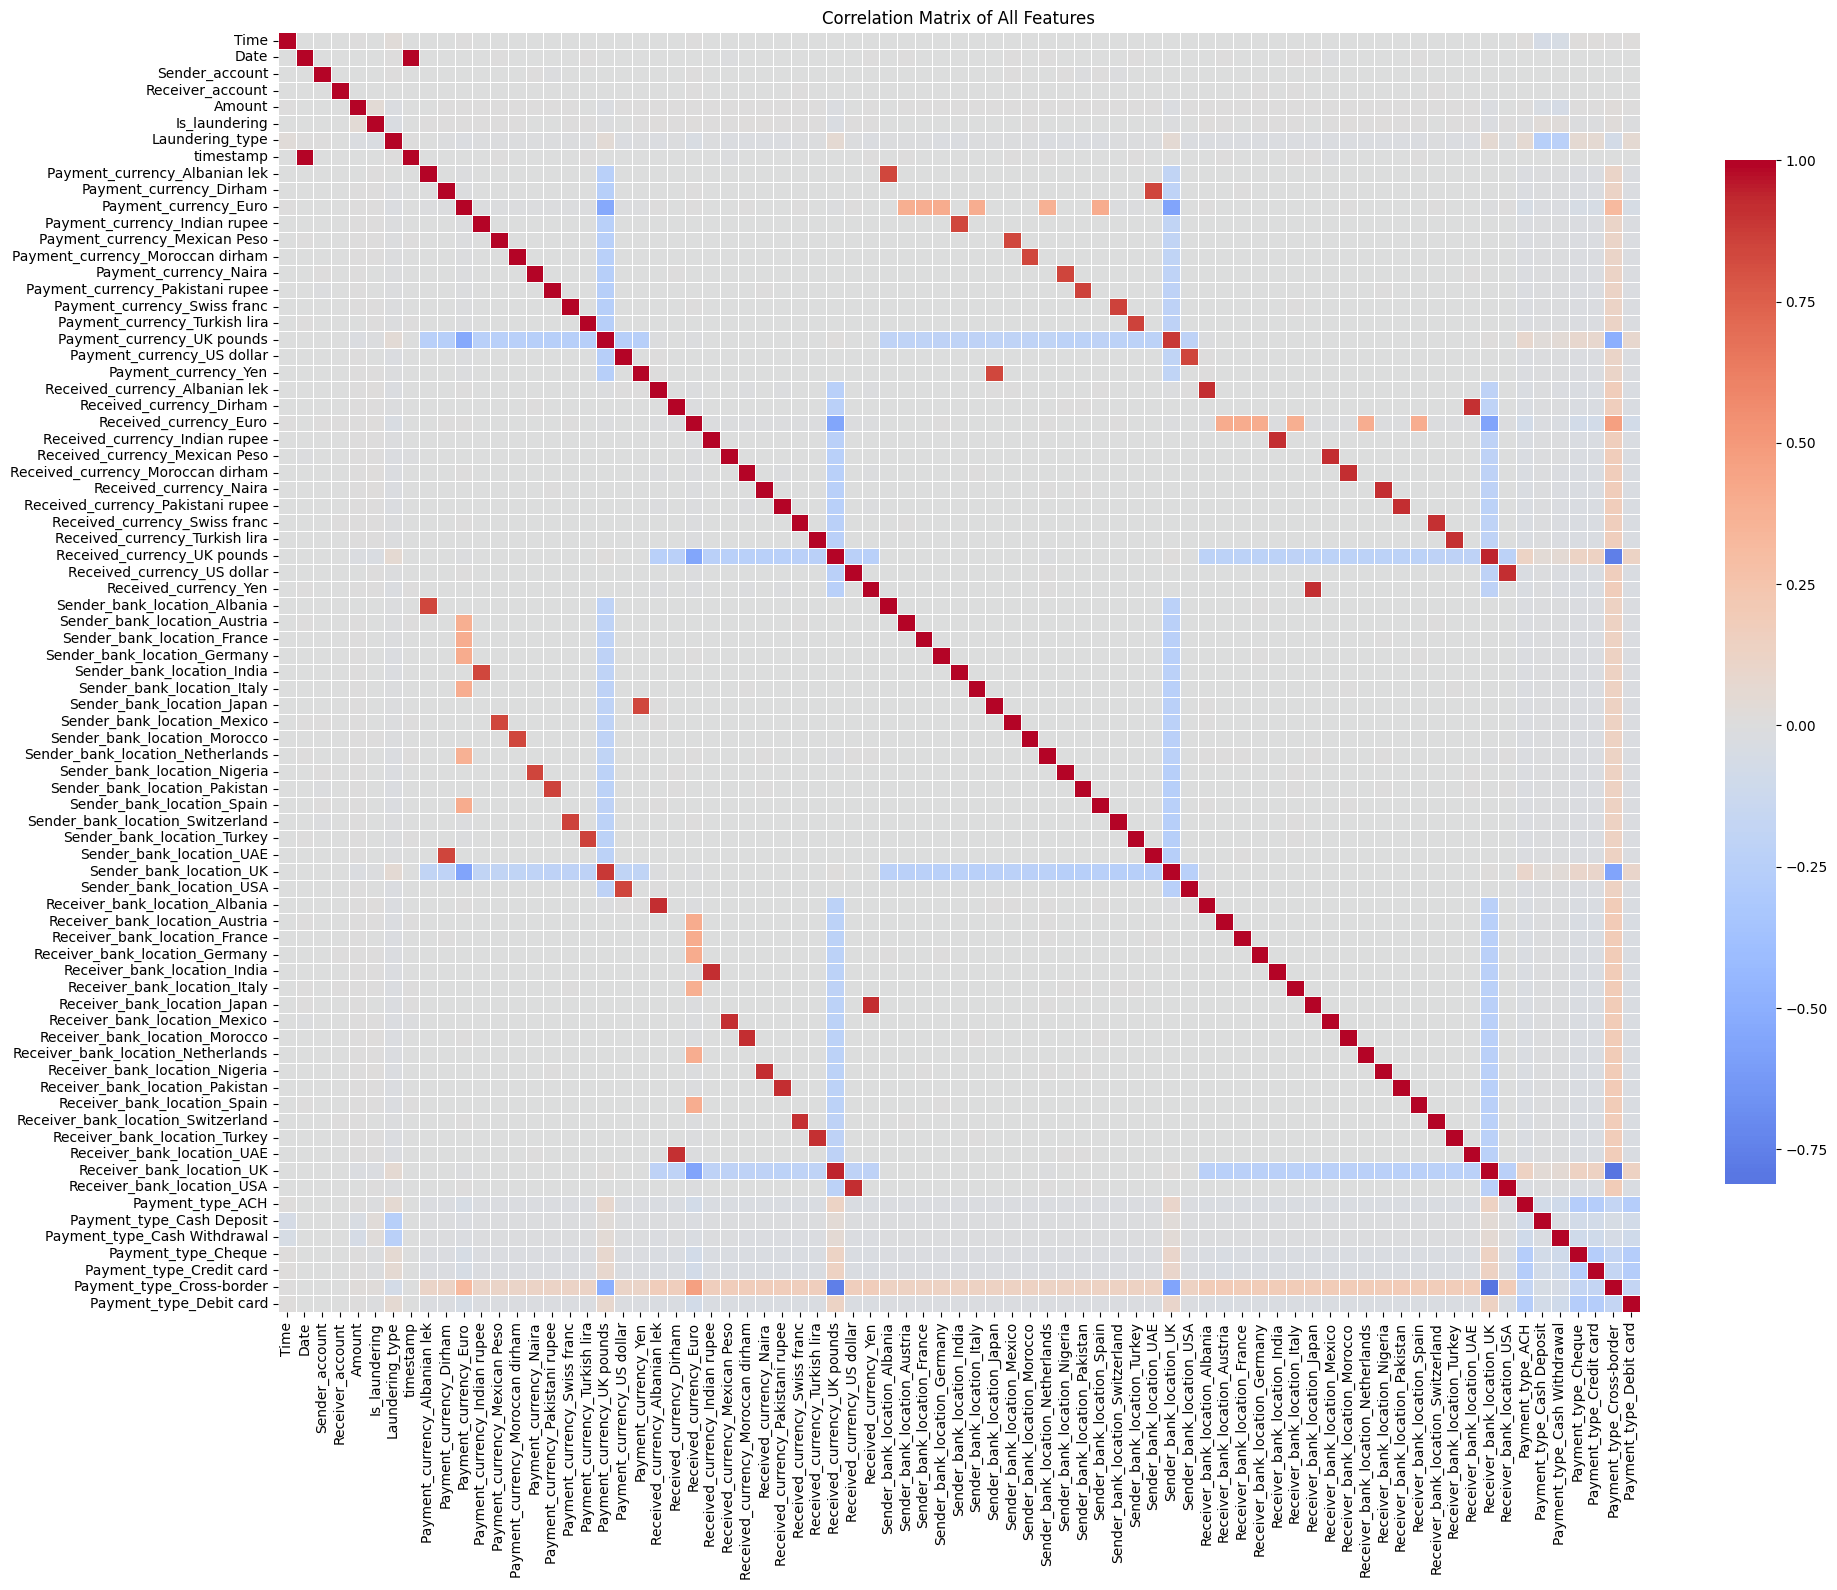

In [10]:
import seaborn as sns

# Correlation matrix for the cleaned dataframe
import matplotlib.pyplot as plt

corr_matrix = cleaned.corr()
print('Correlation matrix shape:', corr_matrix.shape)

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()